In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1** 15pts: 
    
1a) 3pts - In NumPy, create an array of points between $-4$ and $10.423$ with spacing $.0345$.  If you can not do this exactly, how close can you get?  

1b) 3pts - Using vectorization, plot $f(x) = 4x^{5} + 2x^{3} + 1$ for $-3\leq x \leq 10.875$.  Make sure your graph is labeled.   

1c) 3pts - Using vectorization, find the limit as $n\rightarrow \infty$ of the function $f(n)$ where  

$$
f(n) = \frac{1}{n}\sum_{j=0}^{n}\left(3\left(\frac{j}{n}\right)^{3} + 2\left(\frac{j}{n}\right)^{2} + 1\right)
$$

Provide a plot to support your answer.  

1d) 3pts - For the integers less than 4000, what is the sum of those numbers which are divisible by 7, 9, or 23?  

1e) 3pts - For the recurrence relation

$$
p_{n} = -3p_{n-3} + p_{n-1}, ~ n\geq 3, 
$$

where 

$$
p_{0}= .5, ~ p_{1}=2.1, ~ p_{2} = .135,
$$

plot $p_{n}$ for $0\leq n \leq 200$?

_ Answer to Problem 1 _

1a) If we want $.0345 = (10.423+4)/n$, then we would have $n=418.0580$.  Rounding down we would then use the code 
`
np.linspace(-4.,10.423,418+1) 
`
to generate the points with spacing as close as possible to the stated requirement.  

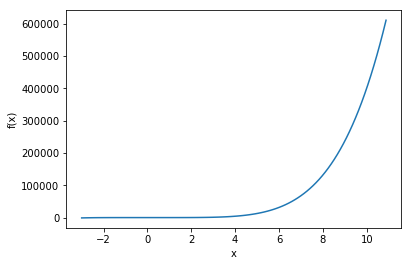

In [2]:
#1b)
xvals = np.linspace(-3.,10.875,int(1e2)+1)
fvals = 4.*(xvals)**5. + 2.*(xvals)**3. + 1.
plt.plot(xvals,fvals)
plt.ylabel('f(x)')
plt.xlabel('x')

Esimate for the limit of f(n) is 2.420167750000000


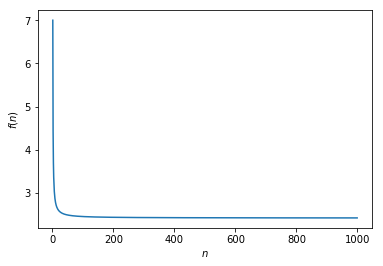

In [25]:
#1c)
def wsum(n):
    nn1 = 1./n
    nvals = nn1*np.linspace(0,n,int(n)+1)
    return nn1*np.sum( 3.*(nvals)**3. + 2.*(nvals)**2. + 1. )
nrange = np.arange(1,1e3)
fvals = [wsum(nval) for nval in nrange]
plt.plot(nrange,fvals)
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
print "Esimate for the limit of f(n) is %1.15f" %wsum(1e3)

As we see from the plot and the value of $f(1000)$ we can estimate that 
$$
\lim_{n \rightarrow \infty} f(n) \approx 2.42016775
$$

In [15]:
#1d)
tot = 0
for jj in xrange(int(4e3)):
    if jj%7==0 or jj%9==0 or jj%23==0:
        tot += jj
print "Our peculiar total is given by: %d" %tot

Our peculiar total is given by: 2168134


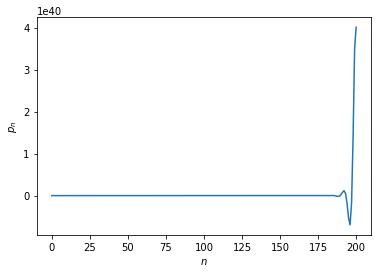

In [21]:
#1e)
def wrec(n):
    pvals = np.zeros(int(n)+1)
    pvals[0] = .5
    pvals[1] = 2.1
    pvals[2] = .135
    if int(n) > 2:
        for jj in xrange(3,int(n)+1):
            pvals[jj] = pvals[jj-1] - 3.*pvals[jj-3]
    return pvals 

ptot = wrec(200)
nvals = np.arange(0,201)
plt.plot(nvals,ptot)
plt.xlabel('$n$')
plt.ylabel('$p_{n}$')

** Problem 2 **: 15pts - Given the function

$$
y(x) = \sum_{l=0}^{\infty} \frac{(-1)^{l}x^{2l}}{3^{l}l!}
$$

2a) 6pts - Determine a recurrence relation between the coefficients.

2b) 6pts - In Python, develop a tolerance based, recursive, vectorized implementation of this function.  

2c) 3pts - Plot this function on the interval $[0,5]$ for tolerances $10^{-6}$ and $10^{-8}$.  Comment on any phenomena you see.  Make sure graphs are labeled, have a legend, and are well sized.  

_ Answer to Problem 2 _

In [6]:
# 2b)
def weird_fun(x,tol):
    tot = np.ones(x.size)
    al = np.ones(x.size)
    xfac = -x**2./3.
    ll = 1
    while np.max(np.abs(al))>=tol:
        al *= xfac/ll
        tot += al
        ll += 1
    return tot

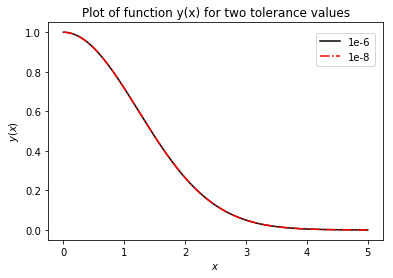

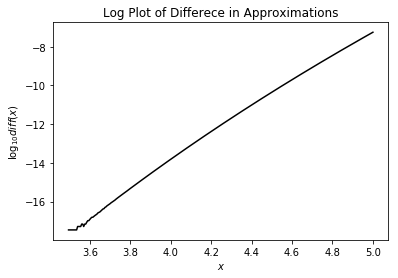

In [10]:
# 2c)
xvals = np.linspace(0.,5.,int(1e3)+1)
yvals1 = weird_fun(xvals,1e-6)
yvals2 = weird_fun(xvals,1e-8)

plt.figure(1)
plt.plot(xvals,yvals1,ls='-',color='k',label='1e-6')
plt.plot(xvals,yvals2,ls='-.',color='r',label='1e-8')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.legend(loc=(.8,.8))
plt.title('Plot of function y(x) for two tolerance values')

plt.figure(2)
plt.plot(xvals,np.ma.log10(np.abs(yvals1-yvals2)),ls='-',color='k')
plt.xlabel('$x$')
plt.ylabel('$\log_{10}diff(x)$')
plt.title('Log Plot of Differece in Approximations')

** Problem 3 **: 15pts - Given the function

$$
y(x) = \cos^{3}(x),
$$

3a) 6pts - Use 

$$
\cos^{2}(x) = \frac{1 + \cos(2x)}{2},
$$, 

since $\cos^{3}(x) = \cos(x)\cos^{2}(x)$, and 

$$
\cos(x)\cos(2x) = \frac{1}{2}\left(\cos(3x) + \cos(x)\right)
$$

to find a Taylor series around $x_{0}=0$ of $\cos^{3}(x)$.  

3b) 6pts - In Python, develop a tolerance based, recursive, vectorized implementation of this function.  

3c) 3pts - Plot this function on the interval $[0,\pi]$.  Provide log plots of the error in your approximation for tolerance values $10^{-2}$, $10^{-4}$, and $10^{-8}$.  Comment on the behavior of your approximations for increasing values of $x$ and for decreasing tolerances.  Note graphs should be well labeled, with legends, and well sized.  

_ Answer to Problem 3 _

** Problem 4**: 15pts - Given that 

$$
e^{t} = \sum_{j=0}^{\infty}\frac{t^{j}}{j!}
$$

4a) 6pts - Using the Taylor series given, develop a tolerance based, recursive, vectorized program which computes the error function $erf(x)$ where

$$
erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} e^{-t^{2}}dt.
$$

4b) 6pts - Plot this function for $0\leq x \leq L_{x}$ for $L_{x}=5,6$.  How does changing your tolerance affect these plots?  Labels and legends as always for the graphs.  

4c) 3pts - Can you infer a trend as $x\rightarrow \infty$ for $erf(x)$?

_ Answer to Problem 4 _